In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import os
#import necessary libraries

In [50]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [51]:
import imageio.v2 as imageio

In [58]:
#initial conditions
l1, l2, m1, m2 = 1, 1, 1, 1 #for simplicity
g = 9.81
y_initial = np.array([np.random.uniform(0,2*np.pi), np.random.uniform(0,2*np.pi), 0, 0]) #theta1, theta2, omega1, omega2

def derivatives(t, y, l1, l2, m1, m2): #v is the vector containing theta1, theta2, omega1, omega2, and the function finds the derivatives.
    """
    function that calculates derivatives of theta1, theta2, omega1, omega2, that we can use to numerically integrate and find trajectories.
    """
    theta1, theta2, omega1, omega2 = y
    theta1dot = omega1
    theta2dot = omega2
    omega1dot = (m2*g*np.sin(theta2)*np.cos(theta1-theta2) - m2*np.sin(theta1-theta2)*(l1*omega1**2*np.cos(theta1-theta2) + l2*omega2**2) - (m1+m2)*g*np.sin(theta1)) / (l1 * (m1 + m2*np.sin(theta1-theta2)**2))
    omega2dot = ((m1+m2)*(l1*omega1**2*np.sin(theta1-theta2) - g*np.sin(theta2) + g*np.sin(theta1)*np.cos(theta1-theta2)) + m2*l2*omega2**2*np.sin(theta1-theta2)*np.cos(theta1-theta2)) / (l2 * (m1 + m2*np.sin(theta1-theta2)**2))
    return theta1dot, theta2dot, omega1dot, omega2dot

y_values = solve_ivp(derivatives, ([0,30.01]), y_initial, args=(l1, l2, m1, m2), t_eval = np.arange(0,30,0.01))

time = y_values['t'] #extract iterables of time and theta values

theta_1 = y_values['y'][0]
theta_2 = y_values['y'][1]
omega_1 = y_values['y'][2]
omega_2 = y_values['y'][3]

x1 = l1 * np.sin(theta_1) #since we have the theta values at every time point, we can now convert to cartesian coordinates.
y1 = -l1 * np.cos(theta_1)
x2 = x1 + l2 * np.sin(theta_2)
y2 = y1 - l2 * np.cos(theta_2)

Directory 'frames' already exists.
0 / 250
1 / 250
2 / 250
3 / 250
4 / 250
5 / 250
6 / 250
7 / 250
8 / 250
9 / 250
10 / 250
11 / 250
12 / 250
13 / 250
14 / 250
15 / 250
16 / 250
17 / 250
18 / 250
19 / 250
20 / 250
21 / 250
22 / 250
23 / 250
24 / 250
25 / 250
26 / 250
27 / 250
28 / 250
29 / 250
30 / 250
31 / 250
32 / 250
33 / 250
34 / 250
35 / 250
36 / 250
37 / 250
38 / 250
39 / 250
40 / 250
41 / 250
42 / 250
43 / 250
44 / 250
45 / 250
46 / 250
47 / 250
48 / 250
49 / 250
50 / 250
51 / 250
52 / 250
53 / 250
54 / 250
55 / 250
56 / 250
57 / 250
58 / 250
59 / 250
60 / 250
61 / 250
62 / 250
63 / 250
64 / 250
65 / 250
66 / 250
67 / 250
68 / 250
69 / 250
70 / 250
71 / 250
72 / 250
73 / 250
74 / 250
75 / 250
76 / 250
77 / 250
78 / 250
79 / 250
80 / 250
81 / 250
82 / 250
83 / 250
84 / 250
85 / 250
86 / 250
87 / 250
88 / 250
89 / 250
90 / 250
91 / 250
92 / 250
93 / 250
94 / 250
95 / 250
96 / 250
97 / 250
98 / 250
99 / 250
100 / 250
101 / 250
102 / 250
103 / 250
104 / 250
105 / 250
106 / 250
107 /

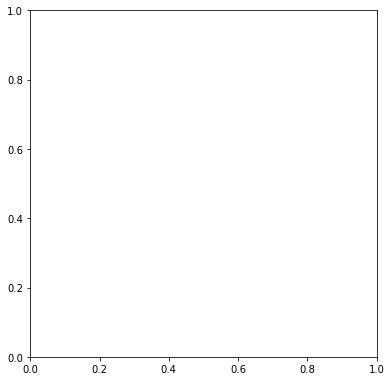

In [59]:
# Plotted bob circle radius
r = 0.05
tmax, dt = 25, 0.01
t = np.arange(0, tmax+dt, dt)# Plot a trail of the m2 bob's position for the last trail_secs seconds.
# This corresponds to max_trail time points.
directory_path = "frames"
try:
    os.mkdir(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_path}' already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    ax.plot(x2[:i+1], y2[:i+1], c='r', solid_capstyle='butt', lw=2)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-l1-l2-r, l1+l2+r)
    ax.set_ylim(-l1-l2-r, l1+l2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames/img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)

In [61]:
frame_dir = 'frames'

# Get a sorted list of file names
frames = sorted(os.listdir(frame_dir))

frames = sorted(f for f in os.listdir(frame_dir) if f.endswith('.png'))
images = []
for frame in frames:
    img_path = os.path.join(frame_dir, frame)
    images.append(imageio.imread(img_path))

# Save as a gif
imageio.mimsave('double_pendulum.gif', images, duration=0.1)  # duration is time per frame in seconds

In [62]:
def energy(x1, y1, x2, y2, omega1, omega2, theta1, theta2, m1, m2, l1, l2):
    V = m1*9.81*y1 + m2*9.81*y2
    T = 0.5 * m1 * (l1 * omega1)**2 + 0.5 * m2 * ((l1 * omega1)**2 + (l2 * omega2)**2 +
            2*l1*l2*omega1*omega2*np.cos(theta1-theta2))
    return T+V

energy_array = energy(x1, y1, x2, y2, omega_1, omega_2, theta_1, theta_2, m1, m2, l1, l2)[0::50]    
x_array = np.linspace(0, 10, len(energy_array))

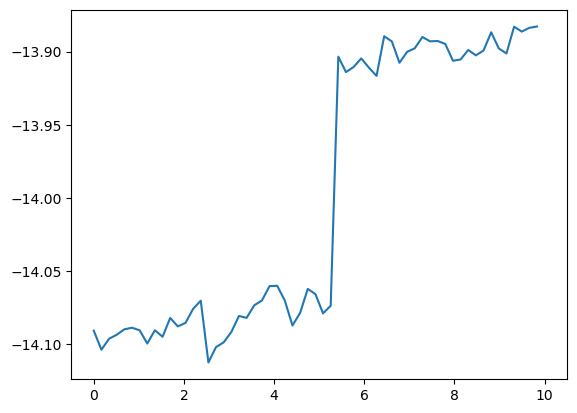

In [63]:
fig, ax = plt.subplots()
line, = ax.plot(x_array, energy_array)

def update(num, x_array, energy_array, line):
    line.set_data(x_array[:num], energy_array[:num])
    return line,

ani = FuncAnimation(fig, update, len(x_array), interval=100, 
                              fargs=[x_array, energy_array, line], blit=True)
ani.save('energy_graph.gif', fps=20)